In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
# Replace 'your_data.csv' with the actual path to your dataset
df = pd.read_csv("C:\\Users\\rinuc\\Desktop\\DS assignments\\Assignment 14\\Company_Data.csv")

# Convert 'Sales' to a categorical variable
df['Sales_Category'] = pd.cut(df['Sales'], bins=[0, 6, 11, 17], labels=['Low', 'Medium', 'High'])
df.drop('Sales', axis=1, inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Use label encoding for categorical variables
label_encoder = LabelEncoder()
df['ShelveLoc'] = label_encoder.fit_transform(df['ShelveLoc'])
df['Urban'] = label_encoder.fit_transform(df['Urban'])
df['US'] = label_encoder.fit_transform(df['US'])
df['Sales_Category'] = label_encoder.fit_transform(df['Sales_Category'])  # Encode the target variable

# Split the data
X = df.drop('Sales_Category', axis=1)
y = df['Sales_Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the decision tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


# Evaluate the model
y_pred = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.65

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.55      0.48        11
           1       0.67      0.64      0.65        22
           2       0.71      0.68      0.70        47

    accuracy                           0.65        80
   macro avg       0.60      0.62      0.61        80
weighted avg       0.66      0.65      0.65        80


Confusion Matrix:
[[ 6  0  5]
 [ 0 14  8]
 [ 8  7 32]]


In [10]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',  # Choose an appropriate scoring metric
                           cv=5)  # Use 5-fold cross-validation

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [11]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [12]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6625

Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.64      0.50        11
           1       0.64      0.82      0.72        22
           2       0.80      0.60      0.68        47

    accuracy                           0.66        80
   macro avg       0.62      0.68      0.63        80
weighted avg       0.70      0.66      0.67        80


Confusion Matrix:
[[ 7  0  4]
 [ 1 18  3]
 [ 9 10 28]]


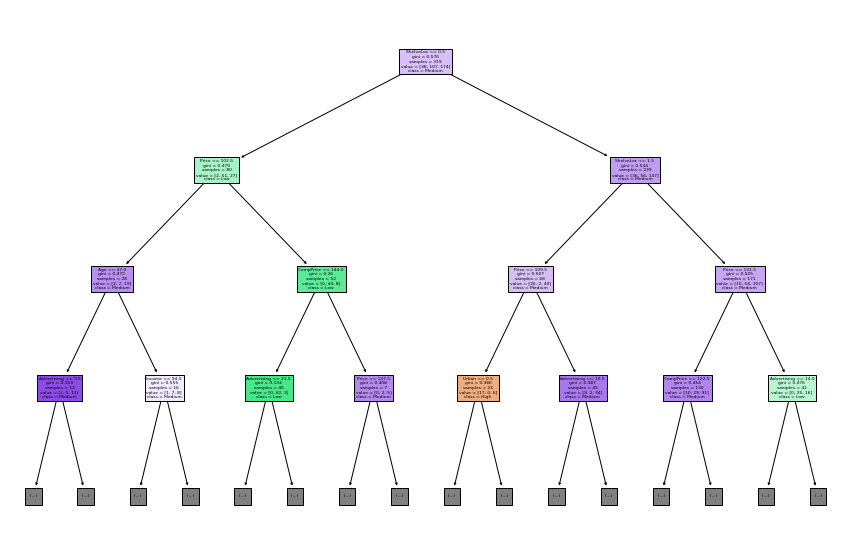

In [16]:
plt.figure(figsize=(15, 10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=label_encoder.classes_, max_depth=3)
plt.show()

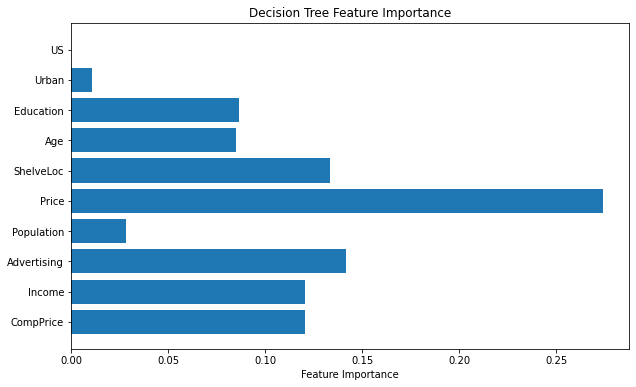

In [14]:
# Visualize Feature Importance
feature_importance = clf.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importance')
plt.show()

In [ ]:
From the above graph we can infer that 'Price' is the attribute that causes highest sale. 